In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.patches as patches
from src.RoiPoolingConv import RoiPoolingConv
from keras.applications.vgg19 import VGG19
from keras.models import Model as kerasModel
import keras.backend.tensorflow_backend as KTF
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input
from src.features import roi

Using TensorFlow backend.


In [2]:
f_m = VGG19(weights='imagenet',include_top=False)
v = VGG19(weights='imagenet')
aa = kerasModel(input=v.input, output=v.get_layer('fc2').output)
# print(v.get_layer('flatten').input)
# fc = kerasModel(input=v.get_layer('block1_conv2').input, output=v.get_layer('fc2').output)
# fc.summary()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., inputs=Tensor("in...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras import backend as K
fc_model = Sequential()
fc_model.add(Dense(4096, kernel_initializer=lambda shape:K.random_normal(shape), input_shape=(25088,)))
fc_model.add(Activation('relu'))
fc_model.add(Dropout(0.5))
fc_model.add(Dense(4096, kernel_initializer=lambda shape:K.random_normal(shape)))
fc_model.add(Activation('relu'))
fc_model.set_weights(v.get_weights()[-6:-2])

In [4]:
# print(len(v.get_weights()))
# len(v.layers), v.weights[-6:-2], v.weights

In [5]:
f_m = VGG19(weights='imagenet',include_top=False)
f_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

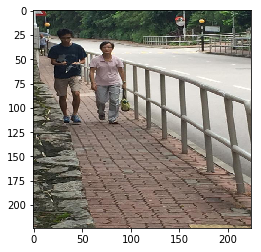

In [6]:
img_path = '/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s1000.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(img)
plt.plot()
x = np.expand_dims(x, axis=0)

In [7]:
features = f_m.predict(x)
features.shape
features.flatten().shape

(25088,)

In [8]:
sess = tf.Session()
Y = roi(sess, features,[0,0,224,224])
print(7*7*512,len(np.where(Y==-np.inf)[0]))

25088 0


In [9]:
tr = f_m.predict(x)

In [10]:
np.where(tr != Y)

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [11]:
state = fc_model.predict(Y.flatten().reshape(1,-1))

In [12]:
state.shape

(1, 4096)

In [13]:
ss = aa.predict(x)
ss.shape

(1, 4096)

In [15]:
state,ss,np.where(state != ss)

(array([[0.      , 0.260144, 0.      , ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 array([[0.      , 0.260144, 0.      , ..., 0.      , 0.      , 0.      ]],
       dtype=float32),
 (array([], dtype=int64), array([], dtype=int64)))